<IPython.core.display.Javascript object>


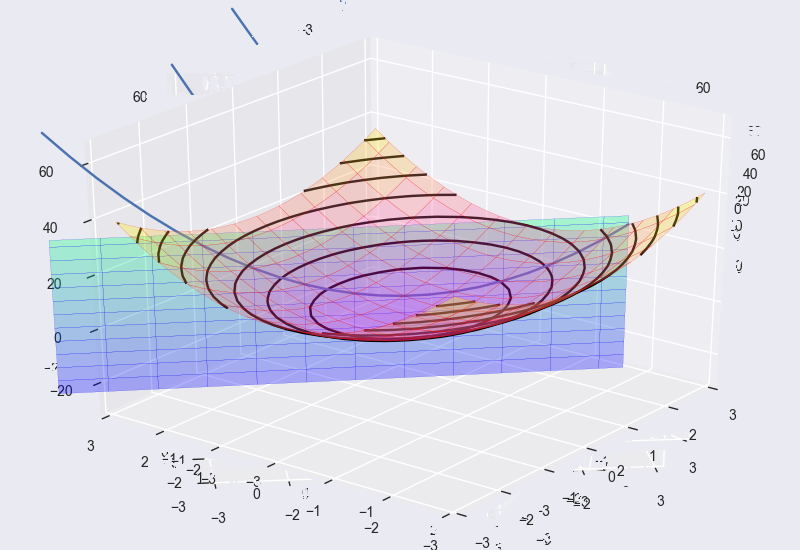

In [34]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib notebook

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
z = np.arange(-30, 30, 2.5)
X, Y = np.meshgrid(x, y)
Z1 = 2*X*X + 3*Y*Y           # surface

#Y軸の数が多いので直す
Y2 = 1-x                     # line
Z2 = 2*x**2 + 3*Y2**2       # line

XX,ZZ = np.meshgrid(x, z)
YY = 1-X


fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,Y2,Z2)
ax.plot_surface(X, Y, Z1, rstride=2, cstride=2, cmap='spring', alpha=0.3, linewidth=0.1, edgecolors='r')
ax.plot_surface(XX, YY, ZZ, rstride=2, cstride=2, cmap='winter', alpha=0.3, linewidth=0.1, edgecolors='b')
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
#ax.contour(X, Y, Z, 10, lw=3, cmap="spring", linestyles="solid", offset=-30)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

plt.show()